# Decision Tree ML Algorithom 

In [1]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sb
import warnings as wr
wr.filterwarnings('ignore')
import matplotlib.pyplot as plt
smoking_data=pd.read_csv('Smoking Data.csv')

In [2]:
smoking_data.head() # show dataset 5 rows

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder#import encoding algorithom

In [4]:
le=LabelEncoder()#crate object

In [5]:
smoking_data['region']=le.fit_transform(smoking_data[['region']])#transform value

In [6]:
smoking_data['sex']=le.fit_transform(smoking_data[['sex']]) # transform value

In [68]:
smoking_data.head() # show dataset 5 rows

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,yes
1,2,18,1,33.770,1,no
2,2,28,1,33.000,3,no
3,1,33,1,22.705,0,no
4,1,32,1,28.880,0,no


# Decision-Tree-Classifier

In [8]:
#Splitting the dataset
x=smoking_data.drop('smoker',axis=1)
y=smoking_data[['smoker']]

In [9]:
from sklearn.model_selection import train_test_split as tts#import train test algorithom

In [10]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=70,random_state=1)#Splitting train,test

In [11]:
from sklearn.tree import DecisionTreeClassifier#import DecisionTreeClassifier algorithom

In [12]:
dtc=DecisionTreeClassifier()#crate object

In [13]:
dtc.fit(x,y)#fit train value

DecisionTreeClassifier()

In [14]:
dtc.predict([[3,19,0,27.900,0]])#predicted value [southwest-3,age-19,female-0,bmi-27.900,children-0]

array(['yes'], dtype=object)

In [15]:
from sklearn import tree # import tree

[Text(1276.4079134666313, 5322.75, 'sex <= 0.5\ngini = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(616.1080673993644, 5096.25, 'bmi <= 22.995\ngini = 0.287\nsamples = 662\nvalue = [547, 115]'),
 Text(114.67372881355932, 4869.75, 'children <= 1.5\ngini = 0.413\nsamples = 72\nvalue = [51, 21]'),
 Text(54.38135593220339, 4643.25, 'bmi <= 21.61\ngini = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(28.3728813559322, 4416.75, 'region <= 0.5\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(18.915254237288135, 4190.25, 'bmi <= 20.045\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(9.457627118644067, 3963.75, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(28.3728813559322, 3963.75, 'age <= 28.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(18.915254237288135, 3737.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.83050847457627, 3737.25, 'bmi <= 20.378\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(28.3728813559322, 3510.75, 'gini = 0.0\nsamples = 1\nvalue =

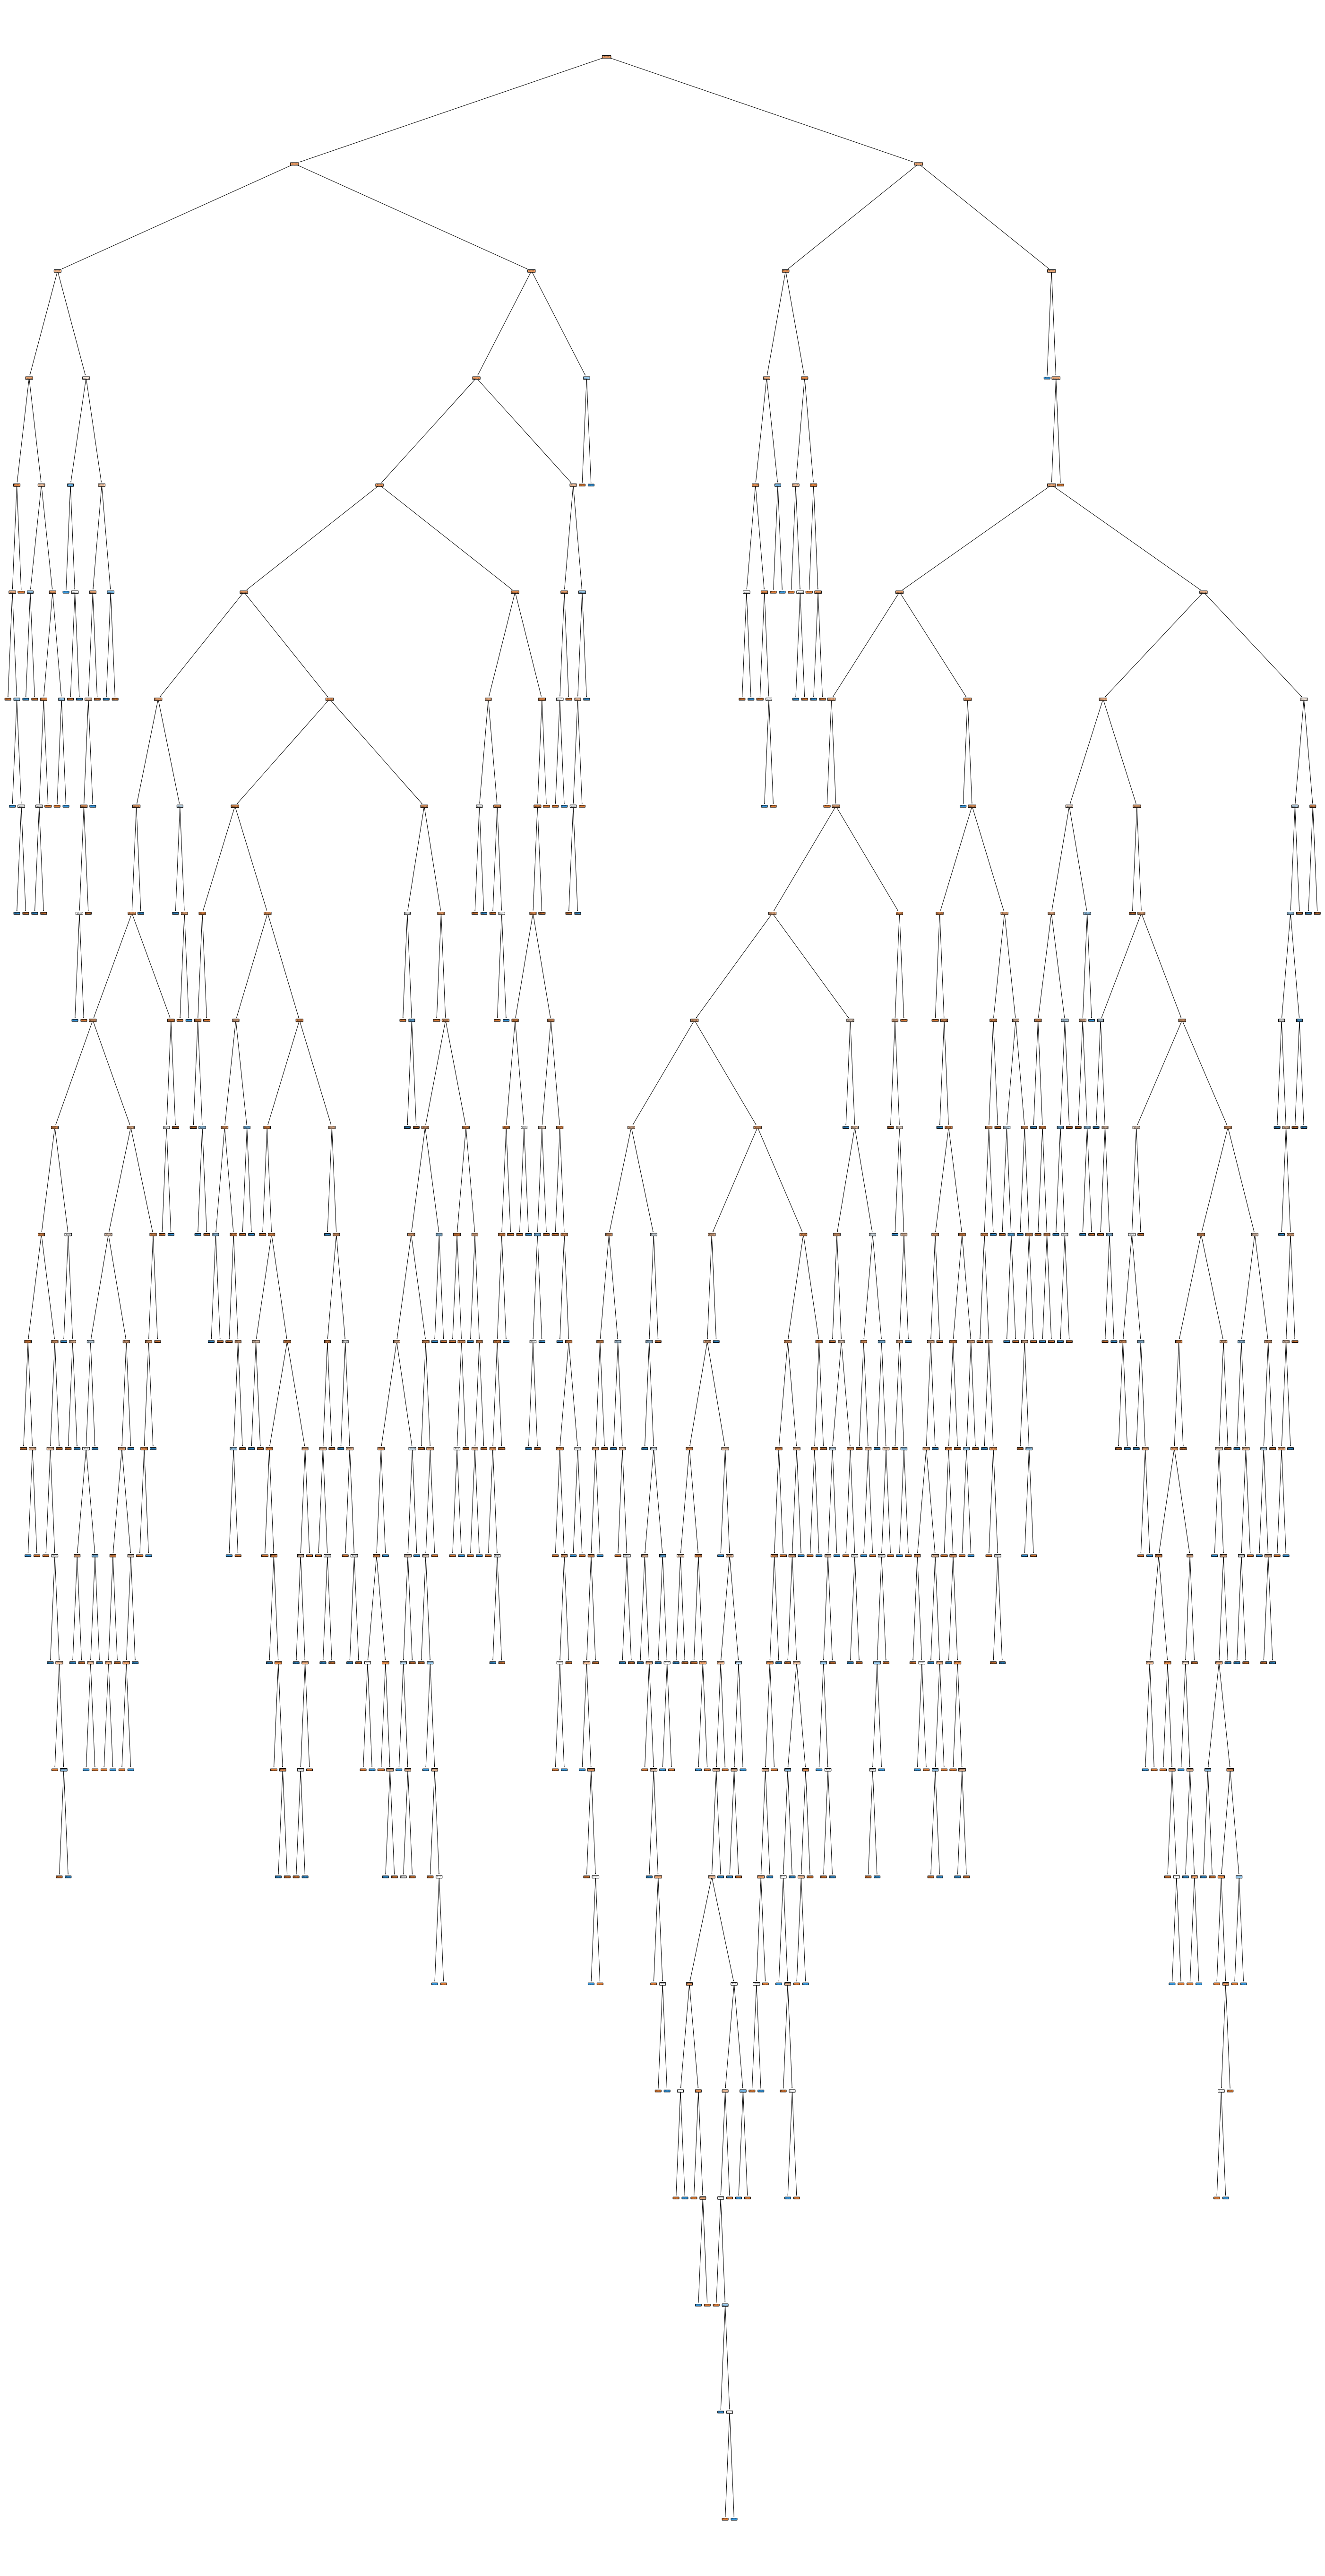

In [16]:
# plot tree
plt.figure(figsize=(50,100))
tree.plot_tree(dtc,filled=True,rounded=True,feature_names=x.columns)

In [17]:
ypred=dtc.predict(xtest) # testing predicted values

In [18]:
ypred # show ypred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [19]:
np.array(ytest) # testing values

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['yes'],
       ['no'],
       ['no']], dtype=object)

In [20]:
# import confusion_matrix ML alggorithom
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [21]:
print(classification_report(ytest,ypred)) # print classification_report

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1007
         yes       1.00      1.00      1.00       261

    accuracy                           1.00      1268
   macro avg       1.00      1.00      1.00      1268
weighted avg       1.00      1.00      1.00      1268



In [22]:
dtc.score(xtest,ytest) # testing score

0.999211356466877

In [23]:
confusion_matrix(ytest,ypred) # confusion_matrix values

array([[1007,    0],
       [   1,  260]], dtype=int64)

In [24]:
(1007+260)/(1007+260+0+1) # confusion_matrix value Accuracy

0.999211356466877

In [25]:
heatmap=confusion_matrix(ytest,ypred) # confusion_matrix values heatmap

<AxesSubplot:>

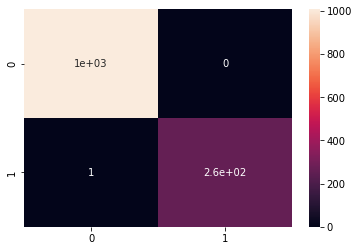

In [26]:
sb.heatmap(heatmap,annot=True) # confusion_matrix values heatmap

In [27]:
tp,fn,fp,tn=confusion_matrix(ytest,ypred).reshape(-1) # confusion_matrix 4 variables

In [28]:
tp,fn,fp,tn # show 4 variables values

(1007, 0, 1, 260)

In [29]:
tp/(tp+fp) # Precision or Positive Predictive Value (PPV)

0.9990079365079365

In [30]:
tn/(tn+fn) # (NPV)

1.0

In [31]:
tp/(tp+fn) # Sensitivity Recall Hit Rate or True Positive Rate(TPR)

1.0

In [32]:
fp/(fp+tn)#False Positive Rate (FPR) or 1-Specificity

0.0038314176245210726

In [33]:
(0.9990079365079365+1.0)/2 # F1 Measure = PPV+TPR/2

0.9995039682539683

In [34]:
(2*0.9990079365079365*1.0)/(0.9990079365079365+1.0)#Harmonic Mean, F1 Score

0.9995037220843672

In [35]:
tn/(tn+fp)#Specificity Selectivity or True Negative Rate (TNR)

0.9961685823754789

In [36]:
tp/(tp+fp+fn)#Threat Score (TS) or Critical Success Index (CSI)

0.9990079365079365

In [37]:
fp/(tp+fp)#False Discovery Rate (FDR)

0.000992063492063492

In [38]:
(tp+tn)/(tp+tn+fp+fn)# accuracy (ACC)

0.999211356466877

In [39]:
(tp+fp)/(tp+fn)/(tn+fp)/(tn+fn)#Matthews correlation coefficient (MCC)

1.4750855417910174e-05

In [40]:
(1.0+0.9961685823754789)/2 # balanced accuracy (BA),TPR+TNR BA=2

0.9980842911877394

In [41]:
(0.9990079365079365+0.9961685823754789)/1 # informedness or bookmaker informedness (BM),BM=TPR+TNR-1

1.9951765188834154

In [42]:
(0.9990079365079365+1.0)/1 # markedness (MK) or deltaP (Ap),MK = PPV + NPV - 1

1.9990079365079365

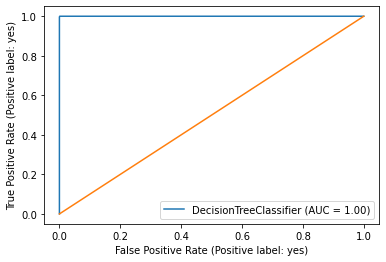

In [43]:
plot_roc_curve(dtc,xtest,ytest) # The Area Under the Curve (AUC)
plt.plot([0,1],[0,1])

# Random-Forest-Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier()

In [46]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [54]:
rfc.score(xtest,ytest)

0.7689274447949527

# Grid-SearchCV

In [48]:
tree = np.random.randint(10,150,30)

In [49]:
criterion = ['gini','entropy','log_loss']
max_depth = np.random.randint(1,10,15)
min_samples_split = [2,4,8]
max_features = ['sqrt','log2',]

In [50]:
ids={'n_estimators':tree,'criterion':criterion,'max_depth':max_depth,
     'min_samples_split':min_samples_split,'max_features':max_features}

In [51]:
from sklearn.model_selection import GridSearchCV

In [59]:
gdcv=GridSearchCV(rfc,ids,n_jobs=10,cv=3)

In [60]:
gdcv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 4, 9, 2, 8, 9, 7, 4, 5, 9, 4, 3, 4, 7, 3]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': array([147, 104,  58,  83,  35,  62,  97,  30, 137,  23,  18, 147,  81,
        77,  60,  43, 111,  25, 124,  16,  79,  61,  21, 119, 102,  14,
        23,  42,  41,  17])})

In [66]:
gdcv.score(xtest,ytest)#GridSearchCV score

0.7634069400630915

In [65]:
dtc.score(xtest,ytest)#DecisionTreeClassifier score

0.999211356466877

In [64]:
rfc.score(xtest,ytest)#RandomForestClassifier score

0.7689274447949527

In [70]:
cv_result = pd.DataFrame(gdcv.cv_results_)

In [73]:
cv_result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.773199,0.039031,0.052081,0.026557,gini,1,sqrt,2,147,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.791667,0.826087,0.826087,0.814614,0.016226,96
1,0.547179,0.012338,0.062495,0.025513,gini,1,sqrt,2,104,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.791667,0.826087,0.826087,0.814614,0.016226,96
2,0.260741,0.007618,0.072912,0.029462,gini,1,sqrt,2,58,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.791667,0.826087,0.826087,0.814614,0.016226,96


In [76]:
gdcv.best_score_

0.8435990338164251

In [77]:
gdcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 14}

In [80]:
gdcv.best_estimator_

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_split=8,
                       n_estimators=14)

In [81]:
gdcv2=gdcv.best_estimator_

In [82]:
gdcv2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_split=8,
                       n_estimators=14)

In [83]:
gdcv2.score(xtest,ytest)

0.7689274447949527